In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
variaveis = df_test.columns

In [56]:
x_raw = df_train[variaveis].drop(['NU_INSCRICAO','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA', 'CO_PROVA_CN','CO_PROVA_CH',
                                  'CO_PROVA_LC','CO_PROVA_MT'], axis='columns')
x_dummies = pd.get_dummies(x_raw[['TP_SEXO']])
x_dummies2 = x_dummies.drop(['TP_SEXO_M'], axis='columns')
x_dummies2.head()

,TP_SEXO_F
0,0
1,1
2,1
3,1
4,0


In [58]:
x_concat = pd.concat([x_raw,x_dummies2], join='outer', axis='columns').drop(['TP_SEXO'],axis='columns')

In [59]:
x_concat.head()

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_SEXO_F
0,24,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,1
2,21,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,1
3,25,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,1
4,28,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,0


In [60]:
# preenchendo NaNs com zeros
x_concat2 = x_concat.fillna(0)

In [61]:
x_concat2.head()

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_SEXO_F
0,24,1,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,0,A,1
2,21,3,1,3,0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,0,A,1
3,25,0,1,1,9,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,1
4,28,2,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0


In [62]:
from sklearn import preprocessing

In [63]:
encoder = preprocessing.LabelEncoder()

In [64]:
x_encoded = x_concat2

In [65]:
x_encoded['Q001'] = encoder.fit_transform(x_encoded['Q001'])

In [66]:
x_encoded.head()

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_SEXO_F
0,24,1,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,D,C,A,A,C,H,A,0
1,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,A,B,A,A,A,0,A,1
2,21,3,1,3,0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,D,C,A,A,A,0,A,1
3,25,0,1,1,9,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,E,E,C,B,C,F,D,1
4,28,2,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,D,C,A,A,B,F,A,0


In [67]:
x_encoded['Q002'] = encoder.fit_transform(x_encoded['Q002'])

In [68]:
x_encoded['Q006'] = encoder.fit_transform(x_encoded['Q006'])

In [69]:
x_encoded['Q024'] = encoder.fit_transform(x_encoded['Q024'])

In [70]:
x_encoded['Q025'] = encoder.fit_transform(x_encoded['Q025'])

In [71]:
x_encoded['Q026'] = encoder.fit_transform(x_encoded['Q026'])

In [72]:
x_encoded['Q047'] = encoder.fit_transform(x_encoded['Q047'])

In [73]:
x_encoded['Q027'] = x_encoded['Q027'].replace(0,'N') 
x_encoded['Q027'] = encoder.fit_transform(x_encoded['Q027'])

In [74]:
x_encoded.head()

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_SEXO_F
0,24,1,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,2,0,0,2,7,0,0
1,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,1,0,0,0,13,0,1
2,21,3,1,3,0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2,0,0,0,13,0,1
3,25,0,1,1,9,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,4,2,1,2,5,3,1
4,28,2,1,1,4,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,0,0,1,5,0,0


In [75]:
X = x_encoded

In [76]:
y = df_train['NU_NOTA_MT'].fillna(0)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=None)

In [78]:
import statsmodels.api as sm 

X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3737.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        15:48:47   Log-Likelihood:                -65481.
No. Observations:               11670   AIC:                         1.310e+05
Df Residuals:                   11635   BIC:                         1.313e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
NU_IDADE                  -0.2202      0.137     -1.612      0.107      -0.488       0.048
TP_COR_RACA               -1.3117      0.630     -2.081      0.037      -2.547      -0.076
TP_NACIONALIDADE          -3.5718      2.384     -1.498      0.134      -8.246       1.102
TP_ST_CONCLUSAO           -1.2008      1.107     -1.085      0.278      -3.371       0.969
TP_ANO_CONCLUIU           -0.0896      0.366     -0.245      0.807      -0.807       0.628
TP_ESCOLA                 22.8830      5.080      4.505      0.000      12.926      32.840
TP_ENSINO                 -2.6897      1.752     -1.535      0.125      -6.123       0.744
IN_TREINEIRO              -2.6868      2.635     -1.020      0.308      -7.852       2.478
TP_DEPENDENCIA_ADM_ESC   -10.0400      2.755     -3.644      0.000     -15.441      -4.639
IN_BAIXA_VISAO             4.9686     16.625      0.299      0.765     -27.620      37.557
IN_CEGUEIRA            -2.793e-13   4.46e-13     -0.626      0.531   -1.15e-12    5.95e-13
IN_SURDEZ                 -1.1001     29.714     -0.037      0.970     -59.345      57.145
IN_DISLEXIA            -7.206e-14      1e-13     -0.720      0.472   -2.68e-13    1.24e-13
IN_DISCALCULIA         -9.559e-14   2.47e-14     -3.873      0.000   -1.44e-13   -4.72e-14
IN_SABATISTA              -9.3632      6.156     -1.521      0.128     -21.430       2.704
IN_GESTANTE                3.5332     21.007      0.168      0.866     -37.645      44.711
IN_IDOSO                  26.8917     66.441      0.405      0.686    -103.344     157.127
TP_PRESENCA_CN           -80.5237      3.637    -22.141      0.000     -87.653     -73.395
TP_PRESENCA_CH           -80.5237      3.637    -22.141      0.000     -87.653     -73.395
TP_PRESENCA_LC           211.2627      7.898     26.750      0.000     195.782     226.743
NU_NOTA_CN                 0.3591      0.013     27.717      0.000       0.334       0.384
NU_NOTA_CH                 0.0386      0.014      2.849      0.004       0.012       0.065
NU_NOTA_LC                 0.3418      0.014     24.887      0.000       0.315       0.369
TP_LINGUA                  0.0403      1.317      0.031      0.976      -2.542       2.622
TP_STATUS_REDACAO         11.2173      1.288      8.708      0.000       8.692      13.742
NU_NOTA_COMP1              0.0721      0.045      1.613      0.107      -0.016       0.160
NU_NOTA_COMP2             -0.0455      0.047     -0.963      0.336      -0.138       0.047
NU_NOTA_COMP3             -0.0193      0.049     -0.397      0.691      -0.115       0.076
NU_NOTA_COMP4              0.0926      0.046      1.994      0.046       0.002       0.184
NU_NOTA_COMP5             -0.0269      0.024     -1.131      0.258      -0.074       0.020
NU_NOTA_REDACAO            0.0729      0.006     12.003      0.000       0.061  

Retirar variáveis com valor P maior do que 5%

In [79]:
X = X.drop(['NU_IDADE','TP_NACIONALIDADE','IN_BAIXA_VISAO',
           'IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA','IN_DISCALCULIA',
           'IN_GESTANTE','IN_IDOSO','TP_LINGUA','NU_NOTA_COMP2',
           'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','Q001',
           'Q002','Q024','Q025','Q026'],axis='columns')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=5)

In [81]:
X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     6709.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        15:48:56   Log-Likelihood:                -65465.
No. Observations:               11670   AIC:                         1.310e+05
Df Residuals:                   11650   BIC:                         1.311e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
TP_COR_RACA               -1.5934      0.624     -2.554      0.011      -2.816      -0.371
TP_ST_CONCLUSAO           -2.7334      1.007     -2.713      0.007      -4.708      -0.759
TP_ANO_CONCLUIU           -0.6306      0.270     -2.334      0.020      -1.160      -0.101
TP_ESCOLA                 15.3535      3.333      4.606      0.000       8.820      21.887
TP_ENSINO                 -4.3949      1.739     -2.528      0.011      -7.803      -0.987
IN_TREINEIRO               2.9404      2.474      1.188      0.235      -1.910       7.791
TP_DEPENDENCIA_ADM_ESC    -5.2293      1.907     -2.743      0.006      -8.966      -1.492
IN_SABATISTA             -10.2404      6.191     -1.654      0.098     -22.375       1.894
TP_PRESENCA_CN           -87.5850      3.751    -23.350      0.000     -94.938     -80.232
TP_PRESENCA_CH           -87.5850      3.751    -23.350      0.000     -94.938     -80.232
TP_PRESENCA_LC           221.2199      8.088     27.352      0.000     205.367     237.073
NU_NOTA_CN                 0.3608      0.013     27.543      0.000       0.335       0.387
NU_NOTA_CH                 0.0599      0.014      4.357      0.000       0.033       0.087
NU_NOTA_LC                 0.3379      0.014     24.437      0.000       0.311       0.365
TP_STATUS_REDACAO         10.6124      1.291      8.218      0.000       8.081      13.144
NU_NOTA_COMP1              0.1381      0.050      2.741      0.006       0.039       0.237
NU_NOTA_REDACAO            0.0516      0.010      5.178      0.000       0.032       0.071
Q006                       3.2895      0.266     12.375      0.000       2.768       3.811
Q027                      -0.3268      0.143     -2.283      0.022      -0.607      -0.046
Q047                       5.8283      0.729      7.990      0.000       4.399       7.258
TP_SEXO_F                -20.8915      1.291    -16.182      0.000     -23.422     -18.361
==============================================================================
Omnibus:                      839.112   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.681
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                       5.609   Cond. No.                     1.06e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
X = X.drop(['IN_TREINEIRO','IN_SABATISTA'],axis='columns')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=None)

In [85]:
X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     7375.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        15:49:58   Log-Likelihood:                -65584.
No. Observations:               11670   AIC:                         1.312e+05
Df Residuals:                   11652   BIC:                         1.313e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
TP_COR_RACA               -1.1593      0.632     -1.834      0.067      -2.398       0.080
TP_ST_CONCLUSAO           -2.0950      0.876     -2.391      0.017      -3.813      -0.377
TP_ANO_CONCLUIU           -0.5810      0.271     -2.141      0.032      -1.113      -0.049
TP_ESCOLA                 13.3569      3.257      4.100      0.000       6.972      19.742
TP_ENSINO                 -4.1138      1.738     -2.367      0.018      -7.520      -0.707
TP_DEPENDENCIA_ADM_ESC    -4.9516      1.918     -2.582      0.010      -8.710      -1.193
TP_PRESENCA_CN           -75.3662      3.571    -21.108      0.000     -82.365     -68.367
TP_PRESENCA_CH           -75.3662      3.571    -21.108      0.000     -82.365     -68.367
TP_PRESENCA_LC           185.9560      7.671     24.242      0.000     170.920     200.992
NU_NOTA_CN                 0.3556      0.013     27.345      0.000       0.330       0.381
NU_NOTA_CH                 0.0282      0.014      2.069      0.039       0.001       0.055
NU_NOTA_LC                 0.3851      0.013     28.605      0.000       0.359       0.411
TP_STATUS_REDACAO         11.3624      1.252      9.078      0.000       8.909      13.816
NU_NOTA_COMP1              0.1571      0.051      3.096      0.002       0.058       0.256
NU_NOTA_REDACAO            0.0567      0.010      5.616      0.000       0.037       0.076
Q006                       3.4189      0.269     12.719      0.000       2.892       3.946
Q027                      -0.2482      0.141     -1.765      0.078      -0.524       0.028
Q047                       5.9021      0.733      8.054      0.000       4.466       7.338
TP_SEXO_F                -22.0800      1.301    -16.975      0.000     -24.630     -19.530
==============================================================================
Omnibus:                      759.189   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2520.901
Skew:                           0.289   Prob(JB):                         0.00
Kurtosis:                       5.202   Cond. No.                     6.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [170]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(normalize=True)
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [171]:
y_previsto = modelo.predict(X_test)

In [172]:
from sklearn import metrics
print('R²: %s' % metrics.r2_score(y_test, y_previsto).round(3))

R²: 0.919


In [173]:
# Treinar com todas a planilha
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [98]:
x_raw_t = df_test[['TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_REDACAO',
       'Q006', 'Q027', 'Q047','TP_SEXO']].fillna(0)

In [99]:
x_raw_t.head()

,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_REDACAO,Q006,Q027,Q047,TP_SEXO
0,3,1,5,1,0.0,0.0,1,1,1,464.8,443.5,431.8,1.0,120.0,420.0,C,C,A,F
1,3,1,8,1,0.0,0.0,1,1,1,391.1,491.1,548.0,1.0,120.0,580.0,C,F,A,F
2,1,2,0,2,3.0,2.0,1,1,1,595.9,622.7,613.6,1.0,80.0,320.0,D,0,A,M
3,3,1,8,1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,G,0,A,F
4,1,2,0,2,1.0,2.0,1,1,1,592.9,492.6,571.4,1.0,100.0,320.0,H,0,A,M


In [104]:
x_dummies_t = pd.get_dummies(x_raw_t['TP_SEXO'])

In [107]:
x_dummies_t = x_dummies_t.drop('M',axis='columns')

In [108]:
x_dummies_t.head()

,F
0,1
1,1
2,0
3,1
4,0


In [109]:
x_concat_t = pd.concat([x_raw_t,x_dummies_t], join='outer', axis='columns')
x_concat_t.head()

,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_REDACAO,Q006,Q027,Q047,TP_SEXO,F
0,3,1,5,1,0.0,0.0,1,1,1,464.8,443.5,431.8,1.0,120.0,420.0,C,C,A,F,1
1,3,1,8,1,0.0,0.0,1,1,1,391.1,491.1,548.0,1.0,120.0,580.0,C,F,A,F,1
2,1,2,0,2,3.0,2.0,1,1,1,595.9,622.7,613.6,1.0,80.0,320.0,D,0,A,M,0
3,3,1,8,1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,G,0,A,F,1
4,1,2,0,2,1.0,2.0,1,1,1,592.9,492.6,571.4,1.0,100.0,320.0,H,0,A,M,0


In [113]:
x_encoded_t = x_concat_t
x_encoded_t['Q027'] = x_encoded_t['Q027'].replace(0,'N') 
x_encoded_t['Q027'] = encoder.fit_transform(x_encoded_t['Q027'])

In [114]:
x_encoded_t['Q006'] = encoder.fit_transform(x_encoded_t['Q006'])
x_encoded_t['Q047'] = encoder.fit_transform(x_encoded_t['Q047'])

In [117]:
X_t = x_encoded_t.drop('TP_SEXO',axis='columns')

In [118]:
y_t = modelo.predict(X_t)

In [119]:
dados = df_test[['NU_INSCRICAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO']].fillna(0)
dados['NU_NOTA_MT'] = y_t

In [120]:
dados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,423.223303
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,447.490932
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,548.337911
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0,0.0,0.0,0.0,-2.243554
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,552.510799


In [121]:
dados['NOTA_PROVA'] = ((2*dados['NU_NOTA_CN'])+(dados['NU_NOTA_CH'])+
                       (1.5*dados['NU_NOTA_LC'])+(3*dados['NU_NOTA_REDACAO'])+
                       (3*dados['NU_NOTA_MT']))/10.5

In [122]:
output = dados[['NU_INSCRICAO','NU_NOTA_MT','NOTA_PROVA']].sort_values('NOTA_PROVA',ascending=False)

In [123]:
output = output.drop('NOTA_PROVA', axis='columns')

In [125]:
output.to_csv('answer.csv', index=False)

In [126]:
X_t_const = sm.add_constant(X_t)
modelo_stats = sm.OLS(y_t, X_t, hasconst=True).fit()
modelo_stats.summary()

/home/murilomen/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.697e+07
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        16:33:10   Log-Likelihood:                -5832.5
No. Observations:                4576   AIC:                         1.170e+04
Df Residuals:                    4558   BIC:                         1.182e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
TP_COR_RACA               -1.3240      0.013   -102.280      0.000      -1.349      -1.299
TP_ST_CONCLUSAO           -1.8336      0.018    -99.444      0.000      -1.870      -1.797
TP_ANO_CONCLUIU           -0.6488      0.006   -113.247      0.000      -0.660      -0.638
TP_ESCOLA                 13.7326      0.068    203.010      0.000      13.600      13.865
TP_ENSINO                 -4.4675      0.035   -125.879      0.000      -4.537      -4.398
TP_DEPENDENCIA_ADM_ESC    -4.7898      0.040   -120.371      0.000      -4.868      -4.712
TP_PRESENCA_CN           -80.1832      0.087   -918.611      0.000     -80.354     -80.012
TP_PRESENCA_CH           -80.1832      0.087   -918.611      0.000     -80.354     -80.012
TP_PRESENCA_LC           200.3040      0.151   1329.909      0.000     200.009     200.599
NU_NOTA_CN                 0.3606      0.000   1303.117      0.000       0.360       0.361
NU_NOTA_CH                 0.0381      0.000    130.403      0.000       0.037       0.039
NU_NOTA_LC                 0.3642      0.000   1355.563      0.000       0.364       0.365
TP_STATUS_REDACAO         11.2066      0.026    432.652      0.000      11.156      11.257
NU_NOTA_COMP1              0.1390      0.001    130.516      0.000       0.137       0.141
NU_NOTA_REDACAO            0.0582      0.000    279.009      0.000       0.058       0.059
Q006                       3.3751      0.006    596.188      0.000       3.364       3.386
Q027                      -0.2866      0.003    -98.302      0.000      -0.292      -0.281
Q047                       5.7913      0.016    369.929      0.000       5.761       5.822
F                        -21.7116      0.027   -802.678      0.000     -21.765     -21.659
==============================================================================
Omnibus:                     5515.310   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2213299.072
Skew:                           5.936   Prob(JB):                         0.00
Kurtosis:                     110.085   Cond. No.                     1.67e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [128]:
y_t = pd.DataFrame(y_t)
classificados = pd.concat([X_t,y_t], join='outer', axis='columns')
classificados.head(25)

,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_REDACAO,Q006,Q027,Q047,F,0
0,3,1,5,1,0.0,0.0,1,1,1,464.8,443.5,431.8,1.0,120.0,420.0,2,2,0,1,423.223303
1,3,1,8,1,0.0,0.0,1,1,1,391.1,491.1,548.0,1.0,120.0,580.0,2,5,0,1,447.490932
2,1,2,0,2,3.0,2.0,1,1,1,595.9,622.7,613.6,1.0,80.0,320.0,3,13,0,0,548.337911
3,3,1,8,1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,13,0,1,-2.243554
4,1,2,0,2,1.0,2.0,1,1,1,592.9,492.6,571.4,1.0,100.0,320.0,7,13,0,0,552.510799
5,3,1,1,1,0.0,0.0,1,1,1,414.5,568.5,542.5,1.0,120.0,560.0,2,13,0,0,479.153572
6,1,2,0,3,1.0,4.0,1,1,1,485.7,654.6,606.6,1.0,140.0,620.0,7,13,3,1,556.025714
7,3,2,0,2,1.0,2.0,1,1,1,423.2,521.0,451.8,1.0,100.0,420.0,1,13,0,1,410.310706
8,3,2,0,2,1.0,2.0,1,1,1,414.4,577.6,548.6,1.0,120.0,740.0,2,3,0,1,472.019925
9,3,2,0,2,1.0,2.0,1,1,1,456.8,518.5,488.7,1.0,120.0,580.0,1,13,0,0,469.407425


In [133]:
classificados['NU_NOTA_MT']=classificados.iloc[:,-1]

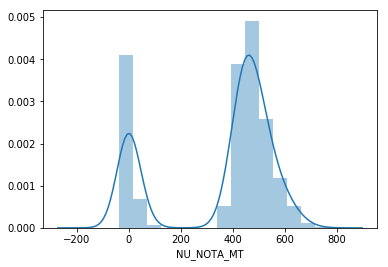

In [137]:
sns.distplot(classificados['NU_NOTA_MT'])

In [147]:
classificados['NU_NOTA_MT']=classificados[0]


In [150]:
classificados = classificados.drop(0,axis='columns')

In [151]:
classificados.head()

,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_REDACAO,Q006,Q027,Q047,F,NU_NOTA_MT
0,3,1,5,1,0.0,0.0,1,1,1,464.8,443.5,431.8,1.0,120.0,420.0,2,2,0,1,423.223303
1,3,1,8,1,0.0,0.0,1,1,1,391.1,491.1,548.0,1.0,120.0,580.0,2,5,0,1,447.490932
2,1,2,0,2,3.0,2.0,1,1,1,595.9,622.7,613.6,1.0,80.0,320.0,3,13,0,0,548.337911
3,3,1,8,1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,13,0,1,-2.243554
4,1,2,0,2,1.0,2.0,1,1,1,592.9,492.6,571.4,1.0,100.0,320.0,7,13,0,0,552.510799


In [156]:
classificados['NU_NOTA_MT_mod'] = classificados['NU_NOTA_MT'].apply(lambda x: 0 if x <= 0 else x)
classificados.head(20)

,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_REDACAO,Q006,Q027,Q047,F,NU_NOTA_MT,NU_NOTA_MT_mod
0,3,1,5,1,0.0,0.0,1,1,1,464.8,443.5,431.8,1.0,120.0,420.0,2,2,0,1,423.223303,423.223303
1,3,1,8,1,0.0,0.0,1,1,1,391.1,491.1,548.0,1.0,120.0,580.0,2,5,0,1,447.490932,447.490932
2,1,2,0,2,3.0,2.0,1,1,1,595.9,622.7,613.6,1.0,80.0,320.0,3,13,0,0,548.337911,548.337911
3,3,1,8,1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,13,0,1,-2.243554,0.000000
4,1,2,0,2,1.0,2.0,1,1,1,592.9,492.6,571.4,1.0,100.0,320.0,7,13,0,0,552.510799,552.510799
5,3,1,1,1,0.0,0.0,1,1,1,414.5,568.5,542.5,1.0,120.0,560.0,2,13,0,0,479.153572,479.153572
6,1,2,0,3,1.0,4.0,1,1,1,485.7,654.6,606.6,1.0,140.0,620.0,7,13,3,1,556.025714,556.025714
7,3,2,0,2,1.0,2.0,1,1,1,423.2,521.0,451.8,1.0,100.0,420.0,1,13,0,1,410.310706,410.310706
8,3,2,0,2,1.0,2.0,1,1,1,414.4,577.6,548.6,1.0,120.0,740.0,2,3,0,1,472.019925,472.019925
9,3,2,0,2,1.0,2.0,1,1,1,456.8,518.5,488.7,1.0,120.0,580.0,1,13,0,0,469.407425,469.407425


In [159]:
dados_n = df_test[['NU_INSCRICAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO']].fillna(0)
dados_n['NU_NOTA_MT'] = classificados['NU_NOTA_MT_mod']

In [160]:
dados_n.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,423.223303
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,447.490932
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,548.337911
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0,0.0,0.0,0.0,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,552.510799


In [161]:
dados_n['NOTA_PROVA'] = ((2*dados_n['NU_NOTA_CN'])+(dados_n['NU_NOTA_CH'])+
                       (1.5*dados_n['NU_NOTA_LC'])+(3*dados_n['NU_NOTA_REDACAO'])+
                       (3*dados_n['NU_NOTA_MT']))/10.5

In [162]:
output = dados_n[['NU_INSCRICAO','NU_NOTA_MT','NOTA_PROVA']].sort_values('NOTA_PROVA',ascending=False)
output.head(20)

,NU_INSCRICAO,NU_NOTA_MT,NOTA_PROVA
1773,c363bec718e45cd6bf8cba599cc3990d77f95c22,769.045446,799.979651
107,328ca19128d276eb4fbc309c54ec7f346c803d2f,730.408409,788.550022
3140,084d4e847b3809c6ee6622dd2e095156230f471b,711.353794,783.048703
1837,e6375694613198f8db0720d7a8a04d8263116116,666.542783,763.740795
2110,34333ed47110024961ff7a95cc92900ab6fbdd33,695.527240,758.698259
3283,d3b6eab5a3d56dc9823cf355b3ac1f647378fd4c,677.077397,755.360209
2889,ef5f221a0c4ed1747aa949dba2f629e98f3a9438,742.087284,755.153510
1037,fe8333dd7a48c2c6da19394b93e6413b2d969588,688.096612,750.613318
2615,c759ad904d22197f1cf3b5ef9e41ee1609513cea,702.685579,750.429213
3272,890014a4e63d88574c62197a24fd43ba5749db83,705.414085,741.023072


In [163]:
output = output.drop('NOTA_PROVA', axis='columns')
output.to_csv('answer.csv', index=False)

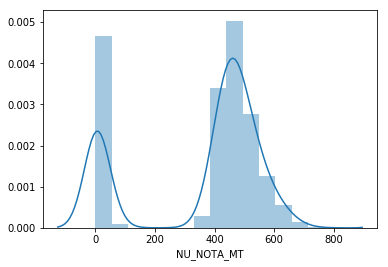

In [164]:
sns.distplot(dados_n['NU_NOTA_MT'])

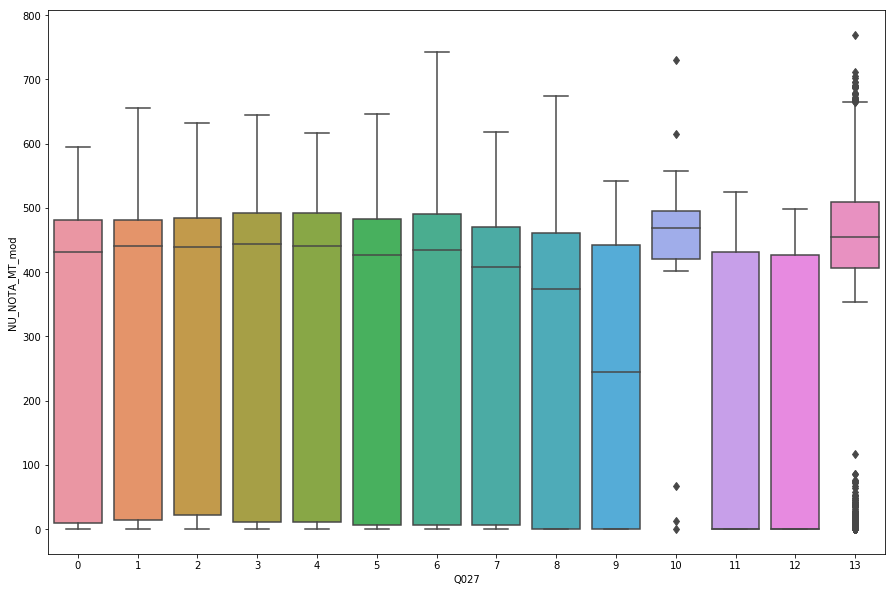

In [168]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Q027', y='NU_NOTA_MT_mod', data=classificados, fliersize=6, notch=False)

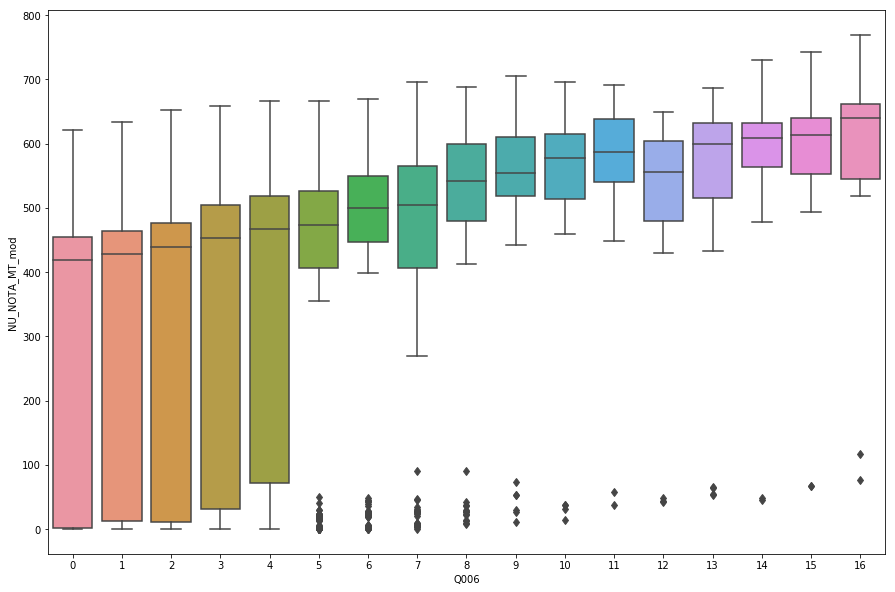

In [169]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Q006', y='NU_NOTA_MT_mod', data=classificados, fliersize=6, notch=False)

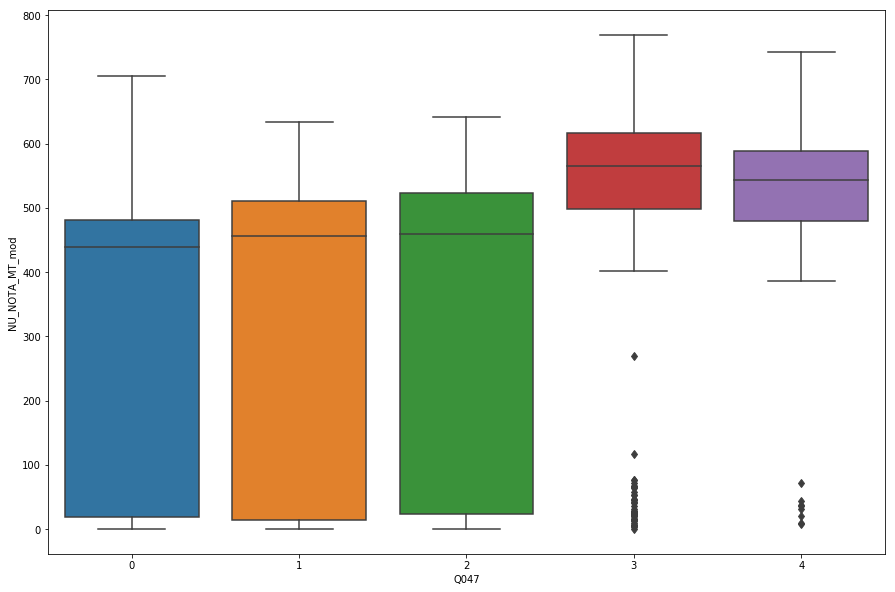

In [174]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Q047', y='NU_NOTA_MT_mod', data=classificados, fliersize=6, notch=False)